

# Project: Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>we are going to explore the Appointment No show data set to figure out what is the most factor impacting attending to the clinic appointment 

### Question(s) for Analysis
>*•*	what is the percentage of the not attending the appointment from over all reserved appointments ?

>*•*	Is there is relation between no show and day’s of the week ( try to find if working days reason for the no show)? 

>*•*	Is there is relation between the age and the no show 


In [2]:
#  import statements for all of the packages that  plan to use.
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import nbconvert
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling
loading the data file and start to explore the data 

In [4]:
# Loading data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# get info about the the data type and number of columns and rows in the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# now let's describe the information in the given data set 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
>Now we will start to clean the data , check is there is any duplicate data , null data , modify the columns headers , and any other needed modification in the data set to start the analysis and build out conclusion 

In [7]:
#first rename all the columns to be all in lower case and use the underscore between headers names 
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# format the scheduledday and appointmentday to the right format and get the day of the week name for every date
df['schedule_day'] = pd.to_datetime(df['scheduledday'])
df['schedule_weekday'] = df['schedule_day'].dt.day_name()
df['appoint_day'] = pd.to_datetime(df['appointmentday'])
df['appoint_weekday'] = df['appoint_day'].dt.day_name()
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,schedule_day,schedule_weekday,appoint_day,appoint_weekday
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,Friday,2016-04-29 00:00:00+00:00,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,Friday,2016-04-29 00:00:00+00:00,Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,Friday,2016-04-29 00:00:00+00:00,Friday
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,Friday,2016-04-29 00:00:00+00:00,Friday
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,Friday,2016-04-29 00:00:00+00:00,Friday


In [9]:
# dropp the unnesseary rows and it's included data to get the needed data with clean format 
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday', 'schedule_day', 'appoint_day'], axis = 1,inplace= True)
df.head(5)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,schedule_weekday,appoint_weekday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [10]:
# check if there is any duplicated data 
df.duplicated().sum()

22973

In [11]:
#drop the duplicated data to analysis the unique data only 
df.drop_duplicates(subset=None, keep='first', inplace=True)
#check if there is any duplicated data remaning
df.duplicated().sum()

0

there is no dublication data 

In [12]:
#check if there is any null value 
df.isnull().sum()

gender              0
age                 0
neighbourhood       0
scholarship         0
hipertension        0
diabetes            0
alcoholism          0
handcap             0
sms_received        0
no_show             0
schedule_weekday    0
appoint_weekday     0
dtype: int64

we doun't have any Null data in the gived data set

seems like we have clean data with 0 dublicated data and 0 null values

<a id='eda'></a>
## Exploratory Data Analysis

now let's go through the data set to find out answers for the research Questions 

### Research Question 1 (what is the percentage of the not attending the appointment from over all reserved appointments ?)

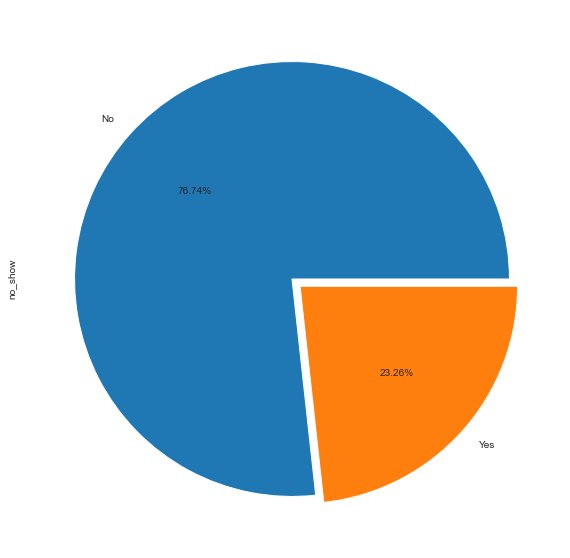

In [13]:
#find the percentage of not attended from over all reserved appointment
df.no_show.value_counts().plot.pie(figsize=(10,10), autopct='%.2f%%', explode=(0, .05));

show that there is about 20,11 % of the reserved appointed not attend



### Research Question  2  (Is there is relation between no show and day’s of the week ( try to find if working days  reason for the  no show)? 

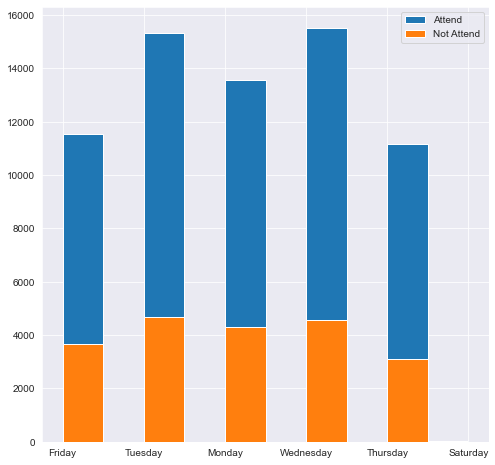

In [14]:
# now i will filter the data with the No show data only to find out what is the most common factor for the no show cases 

attend = (df.no_show == 'No')
not_attend = (df.no_show == 'Yes')

# explore the relation between the week days with the attening 

df[attend].appoint_weekday.hist(figsize =(8,8))
df[not_attend].appoint_weekday.hist(figsize =(8,8))
plt.legend(['Attend', 'Not Attend']); 

We can find the there is no strong relation between the no show and working day’s or the start or end of the week , but also it’s show that Wednesday and Tuesday have the highest reserved appointment comparing with the other day’s of the week and have approximately the same number of no show cases 

### Research Question 3  (Is there is relation between the age and the no show ?)

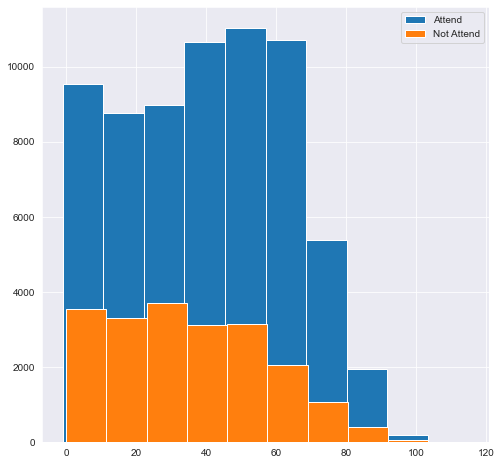

In [15]:
#Exploring the relation between the age and the attend and not attend data 

df[attend].age.hist(figsize =(8,8))
df[not_attend].age.hist(figsize =(8,8))
plt.legend(['Attend', 'Not Attend']); 

It seems like there is relation between age and attending the appointment or not as it’s showed above as patient above 40 showed less number of no show comparing with the other age stages and the number of reserved appointment 

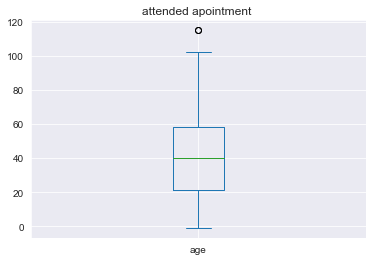

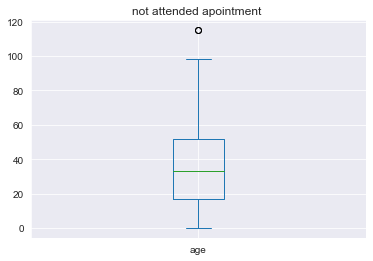

In [16]:
# find the average age of attending and not attending patint 
df[attend].plot(x='appoint_weekday' , y= 'age' ,title ='attended apointment ' , kind ='box')
df[not_attend].plot(x='appoint_weekday' , y= 'age' ,title ='not attended apointment ' , kind ='box');


We have more than 50% from the patient with higher attending between 40 to 60 

Exploring if there is any other factor had the impact in the no show 

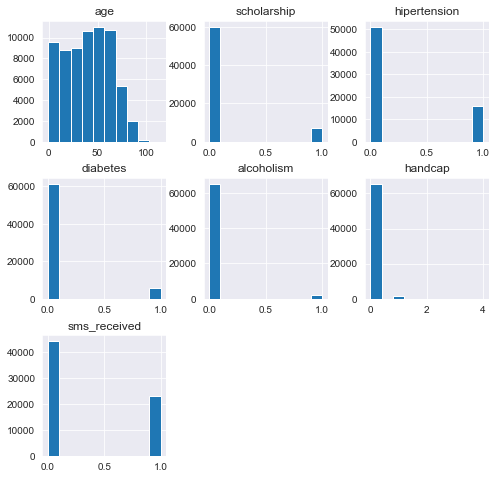

In [17]:
#explore all the factors for the attending 
df[attend].hist(figsize =(8,8));

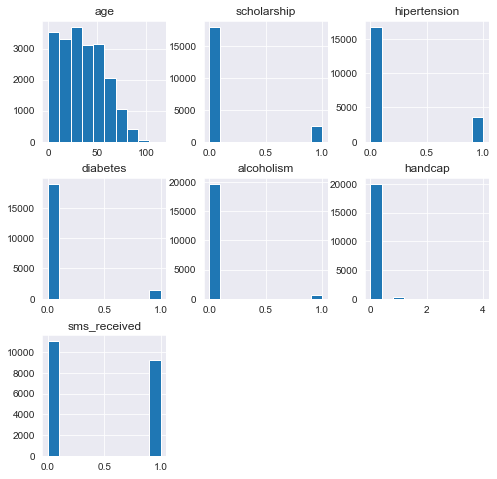

In [18]:
#explore all the factors for not attending 
df[not_attend].hist(figsize =(8,8));

<a id='conclusions'></a>
## Conclusions

According to the above analysis we can find the below points :
>•	We have about 23,26% of the reserved appointments not attend the appointment

>•	There is no relation between working day’s or the week end and the no show , even we found the Tuesday and Wednesday show high variance in the reserved appointments with the same behavior of no show comparing with the other day’s ( high reservations with low no show )

>•	Patients age above 40 years old showing high numbers of reserving appointments with low number of no show cases and the percentage increase with increasing of age stage 

>•	SMS notification had no impact on attending the appointment as it’s show the number of patients received SMS and not attend mush more than attending one 

>•	Other factor not show any impact in attending or not attending behavior , as it’s almost similar



In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1